[Download DATASETS from here](https://drive.google.com/drive/folders/1cBv9fiBQE2PedVPvTu56tOMIOtJTjTj1?usp=sharing)

In [3]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
df0 = pd.read_csv('/content/drive/Shareddrives/utshabkg/Dataset/serum_processed.csv')
df0.head()

,Unnamed: 0,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,2-ketoglucose dimethylacetal NIST,2-ketoisocaproic acid,3-(3-hydroxyphenyl)propionic acid,3-aminoisobutyric acid,3-hydroxybutanoic acid,3-hydroxybutyric acid,3-phosphoglycerate,5-hydroxynorvaline NIST,5-methoxytryptamine,acetoacetate,aconitic acid,adenosine-5-monophosphate,alanine,alloxanoic acid NIST,alpha-ketoglutarate,aminomalonate,arabitol,arachidic acid,arachidonic acid,asparagine,aspartic acid,azelaic acid,behenic acid,benzoic acid,beta-alanine,butane-2_3-diol NIST,butyrolactam NIST,capric acid,caprylic acid,...,pelargonic acid,phenol,phenylalanine,phenylethylamine,phosphate,phosphoethanolamine,pipecolinic acid,piperidone,proline,propane-1_3-diol NIST,pseudo uridine,pyrophosphate,pyrrole-2-carboxylic acid,pyruvic acid,quinic acid,ribose,salicylaldehyde,salicylic acid,serine,shikimic acid,stearic acid,sucrose,tartaric acid,taurine,threitol,threonic acid,threonine,tocopherol alpha-,tocopherol gamma-,trans-4-hydroxyproline,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,0,9582,279,82,61,357,122,24944,56,32,966,70,6338,48,271,1602,2646,33,98,629,306,104,24,203008,41,248,752,235,1346,154,1336,1595,86,264,1050,937,281,342,187,416,...,2238,1717,13187,99,7965,54,772,88,173034,608,478,2141,91,3149,196,113,69,31,8217,1405,99859,122,84,4540,337,849,12787,2028,251,2492,34239,54924,43,226295,11606,68,153849,194,811,disease
1,1,28847,161,78,84,205,258,10680,104,49,1076,75,6082,102,1104,300,1977,39,72,70,472,118,66,273015,85,160,965,262,948,276,1928,3204,117,460,1726,257,326,338,299,571,...,3840,2126,15811,179,11304,72,672,95,141407,790,1052,1263,65,1849,41,177,403,234,9588,2758,71934,253,51,6454,219,651,12737,1850,641,3428,20080,37597,203,96226,10188,71,110735,294,910,disease
2,2,13627,162,53,133,139,159,27201,160,80,1117,60,6812,126,425,1127,4550,55,146,130,470,84,54,257699,54,184,724,361,1263,1642,1900,2336,251,317,3216,413,231,186,338,865,...,11679,2770,11101,110,8000,60,546,54,88067,991,505,2482,83,721,461,186,276,1291,7523,1259,130069,121,50,4608,152,1833,10888,3722,551,2796,29191,28707,211,155596,16617,123,95509,253,804,disease
3,3,20758,6671,93,78,335,225,32347,242,59,304,53,1014,93,1953,543,34837,75,151,70,400,82,34,122666,103,142,1009,46,1857,908,1513,3493,148,458,2072,264,117,464,296,658,...,6030,1985,14371,652,13248,56,481,50,72115,888,957,2277,71,156,82,181,135,102,13751,1681,173705,109,85,6287,265,1880,12901,2128,420,3161,16637,27873,71,191671,15214,84,96219,157,806,disease
4,4,15692,108,98,69,250,120,18357,60,25,1220,74,6319,713,800,1389,5288,34,421,194,302,123,31,247523,52,138,1980,350,688,334,1809,1202,156,255,1413,867,218,189,231,468,...,3510,745,14421,111,19080,38,183,72,100497,513,904,1141,59,1147,2428,266,167,65,9956,1249,65181,36,29,2854,408,495,15442,1483,401,5552,29820,30132,200,333019,20281,62,159853,188,1226,disease


In [4]:
labels = np.reshape(df0.Class.to_numpy(), (82,1))
# labels

# Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

scl = StandardScaler().fit(df0.iloc[:, :-1])
stand = scl.transform(df0.iloc[:, :-1])
# stand
df = pd.DataFrame(stand, columns = df0.columns[:-1])
df = pd.concat([df, df0.iloc[:, -1]], axis=1)
df

,Unnamed: 0,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,2-ketoglucose dimethylacetal NIST,2-ketoisocaproic acid,3-(3-hydroxyphenyl)propionic acid,3-aminoisobutyric acid,3-hydroxybutanoic acid,3-hydroxybutyric acid,3-phosphoglycerate,5-hydroxynorvaline NIST,5-methoxytryptamine,acetoacetate,aconitic acid,adenosine-5-monophosphate,alanine,alloxanoic acid NIST,alpha-ketoglutarate,aminomalonate,arabitol,arachidic acid,arachidonic acid,asparagine,aspartic acid,azelaic acid,behenic acid,benzoic acid,beta-alanine,butane-2_3-diol NIST,butyrolactam NIST,capric acid,caprylic acid,...,pelargonic acid,phenol,phenylalanine,phenylethylamine,phosphate,phosphoethanolamine,pipecolinic acid,piperidone,proline,propane-1_3-diol NIST,pseudo uridine,pyrophosphate,pyrrole-2-carboxylic acid,pyruvic acid,quinic acid,ribose,salicylaldehyde,salicylic acid,serine,shikimic acid,stearic acid,sucrose,tartaric acid,taurine,threitol,threonic acid,threonine,tocopherol alpha-,tocopherol gamma-,trans-4-hydroxyproline,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,-1.711055,-1.259794,-0.138838,-0.621626,-0.622613,0.295096,-0.931814,0.859699,-0.801984,-0.470732,-0.170024,0.170909,1.404589,-0.580554,-1.160230,2.303685,-0.454552,-1.284786,-0.884310,1.849864,-0.311158,-0.292202,-0.706198,-0.390359,-0.521228,0.983654,-1.000902,-0.455371,0.147738,-1.005745,-0.891355,-0.413389,-0.561017,-0.229331,-1.645662,1.531501,-0.182798,0.245884,-0.657663,-0.706998,...,-1.418779,-0.121362,-0.343844,-0.760425,-1.206436,-0.486368,-0.094653,-0.219614,2.162597,-0.823958,-0.784869,0.841750,0.098622,1.817697,-0.659995,-0.492195,-1.334423,-0.287678,-0.976711,0.105544,0.218308,-0.037335,0.034340,0.005331,0.277538,-0.851358,-0.680530,-0.505513,-0.707882,-0.945716,0.707152,1.990466,-0.509527,0.322589,-0.944967,-0.196688,1.542466,-0.351356,0.002295,disease
1,-1.668807,0.828579,-0.170872,-0.724447,-0.417612,-0.583565,0.355070,-0.864481,-0.027166,-0.372528,0.027454,0.315092,1.247140,-0.177750,1.081213,-1.570529,-0.482830,-0.883698,-1.054991,-0.794414,0.526226,0.147441,-0.117443,0.999207,1.601336,0.122136,-0.524508,-0.389567,-0.134936,-0.777267,0.625239,0.176392,-0.353039,-0.027579,-0.091195,-0.617055,-0.076957,0.222045,0.676549,-0.173074,...,-0.546850,0.446950,0.299430,-0.465585,-0.358401,0.232230,-0.120831,-0.182937,1.157568,0.283458,0.286355,-0.279400,-0.475867,0.786393,-0.848747,-0.188129,1.411008,-0.249877,-0.485742,2.093614,-0.625427,1.204326,-0.348064,0.857427,-0.388994,-1.003995,-0.694738,-0.642179,0.810432,-0.543241,-1.325690,0.178488,-0.025493,-1.355050,-1.170035,-0.086721,-0.218158,-0.045440,0.244268,disease
2,-1.626559,-0.821306,-0.170600,-1.367077,0.019131,-0.965089,-0.581706,1.132517,0.876789,-0.193450,0.101060,-0.117456,1.696116,0.001274,-0.745846,0.890281,-0.374073,0.185870,-0.569205,-0.510592,0.516137,-0.920263,-0.285659,0.695200,0.105893,0.357095,-1.063527,-0.148283,0.088788,1.780934,0.553508,-0.141775,0.545963,-0.174776,3.335071,-0.124151,-0.300399,-0.683868,1.141141,0.839660,...,3.719722,1.341798,-0.855227,-0.719884,-1.197547,-0.246835,-0.153815,-0.397759,-0.537447,1.506484,-0.734481,1.277185,-0.078143,-0.108461,-0.337289,-0.145370,0.367087,-0.053056,-1.225239,-0.108985,1.131081,-0.046814,-0.359652,0.035604,-0.767448,-0.092799,-1.220181,0.795118,0.460052,-0.814997,-0.017602,-0.751187,-0.001291,-0.589292,-0.149613,1.819363,-0.839934,-0.170865,-0.014814,disease
3,-1.584311,-0.048288,1.596447,-0.338869,-0.471090,0.167921,0.042811,1.754546,2.200437,-0.314761,-1.358484,-0.319312,-1.869855,-0.244884,3.365708,-0.847462,0.906113,1.522830,-0.536382,-0.794414,0.163023,-0.983069,-0.566018,-1.985065,2.469658,-0.054084,-0.426098,-0.916004,0.510669,0.406322,-0.437914,0.282325,-0.145061,-0.029638,0.704435,-0.594937,-0.568530,0.972999,0.640811,0.126613,...,0.645112,0.251028,

# Student's   t-Test

In [6]:
X = df.drop('Class', axis=1)
y = df['Class'].copy()
y = y.map({"control": 1, "disease": 0})

X.shape, y.shape

((82, 159), (82,))

In [7]:
disease = df[(df['Class']=='disease')]
control = df[(df['Class']=='control')]

In [8]:
from scipy import stats

Before the t-test can be conducted, one needs to test the assumptions. First to test for the homogeneity of variances. To do this, I will use Levene’s test for homogeneity of variance. 

In [9]:
stats.levene(disease['1_5-anhydroglucitol'], control['1_5-anhydroglucitol'])

LeveneResult(statistic=0.08168201420457542, pvalue=0.7757695323771979)

The test is not significant meaning there is homogeneity of variances and we can proceed. If the test were to be significant, a viable alternative would be to conduct a Welch’s t-test. Next to test the assumption of normality. This can be done visually with a histogram and/or as a q-q plot, and by using the Shapiro-Wilk test which is the stats.shaprio() method. First, I will check them visually.

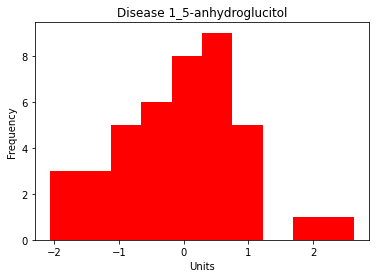

In [10]:
disease['1_5-anhydroglucitol'].plot(kind="hist", title="Disease 1_5-anhydroglucitol", color='red')
plt.xlabel("Units")
plt.savefig('disease_1_5-anhydroglucitol')

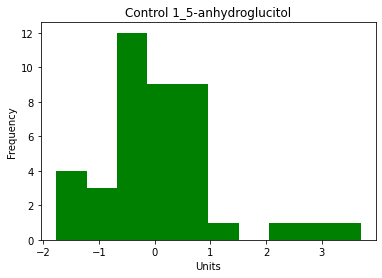

In [11]:
control['1_5-anhydroglucitol'].plot(kind='hist', title='Control 1_5-anhydroglucitol', color='green')
plt.xlabel("Units")
plt.savefig('control_1_5-anhydroglucitol')

From the looks of the histogram, each variable appears to be fairly normally distributed. Let’s see how it looks on a q-q plot, it’s easier to get a sense of normality visualizing the data as q-q plot. If you are unfamiliar with reading a q-q plot, the data should be on the red line. If there are data points that are far off of it, it’s an indication that there are some deviations from normality.

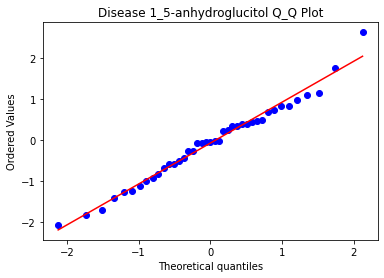

In [12]:
stats.probplot(disease['1_5-anhydroglucitol'], dist='norm', plot=plt)
plt.title('Disease 1_5-anhydroglucitol Q_Q Plot')
plt.savefig('disease_1_5-anhydroglucitol_qqplot')

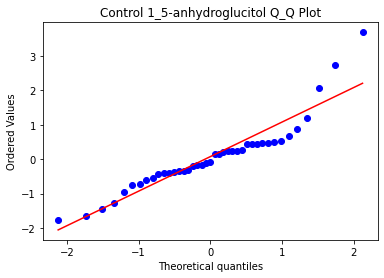

In [13]:
stats.probplot(control['1_5-anhydroglucitol'], dist='norm', plot=plt)
plt.title('Control 1_5-anhydroglucitol Q_Q Plot')
plt.savefig('control_1_5-anhydroglucitol_qqplot')

There is some deviation from normality in the Control q-q plot, but it does not appear to be a large violation. In all, the data looks to have normality. To be sure, we can test it statistically using the Shapiro-Wilk test for normality. The first value is the W test statistic and the second value is the p-value.

In [14]:
stats.shapiro(disease['1_5-anhydroglucitol'])

(0.9842028021812439, 0.8295468688011169)

In [15]:
stats.shapiro(control['1_5-anhydroglucitol'])

(0.8905898928642273, 0.0008849935256876051)

Neither of the tests for normality we significant meaning neither of the variables violates the assumption of normality. We can continue as planned(Independent t-test).

In [16]:
stats.ttest_ind(disease['1_5-anhydroglucitol'], control['1_5-anhydroglucitol'])

Ttest_indResult(statistic=-0.6715698446695524, pvalue=0.5037922623669445)

In [17]:
def test(feature):
    l_test = stats.levene(disease[feature], control[feature])
    disease_shapiro = stats.shapiro(disease[feature])
    control_shapiro = stats.shapiro(control[feature])
    t_test, t_test_p = stats.ttest_ind(disease[feature], control[feature])
    k_test, k_test_p = stats.kruskal(disease[feature], control[feature])
    return feature, l_test, disease_shapiro, control_shapiro, t_test, t_test_p, k_test, k_test_p

In [18]:
df.columns[0]

'Unnamed: 0'

In [19]:
result = []
for i in range(1, 159):
    result.append(test(df.columns[i]))

In [20]:
result_df = pd.DataFrame(result, columns=['Metabolics', 'Levene test', 'Disease', 'Control', 't-Test', 'p-value(t)', 'Kruskal-Wallis', 'p-value(k)'])
result_df.to_csv('test.csv')
result_df

,Metabolics,Levene test,Disease,Control,t-Test,p-value(t),Kruskal-Wallis,p-value(k)
0,1_5-anhydroglucitol,"(0.08168201420457542, 0.7757695323771979)","(0.9842028021812439, 0.8295468688011169)","(0.8905898928642273, 0.0008849935256876051)",-0.671570,0.503792,0.055926,0.813055
1,1-monostearin,"(0.21698530723569232, 0.642612377796838)","(0.33299416303634644, 2.014246842235723e-12)","(0.15959978103637695, 5.716438336144519e-14)",-0.429629,0.668620,1.759166,0.184729
2,2_3-dihydroxybutanoic acid NIST,"(2.1028740841642413, 0.15093194418327313)","(0.9728131890296936, 0.4239427447319031)","(0.9394952058792114, 0.030200554057955742)",-1.621380,0.108871,2.515488,0.112733
3,2_4-diaminobutyric acid,"(2.005343302606339, 0.1606276376133557)","(0.7901197671890259, 3.409238615859067e-06)","(0.6828699111938477, 3.9536910634296873e-08)",-1.276684,0.205407,0.834746,0.360904
4,2-deoxyerythritol,"(1.1703907689463615, 0.28257124687554563)","(0.8642473220825195, 0.00017113779904320836)","(0.8492590188980103, 7.184548303484917e-05)",0.152612,0.879089,0.055930,0.813049
...,...,...,...,...,...,...,...,...
153,uric acid,"(0.20590803401173297, 0.6512223320349342)","(0.9478169679641724, 0.058673445135354996)","(0.9716638326644897, 0.39008888602256775)",-2.589983,0.011401,6.815414,0.009037
154,uridine,"(0.05394458709869653, 0.8169294115516839)","(0.9732468128204346, 0.4372553527355194)","(0.9383873343467712, 0.027676492929458618)",0.649421,0.517926,0.877600,0.348860
155,valine,"(0.9955795056010915, 0.32139100472095594)","(0.9663439393043518, 0.26053282618522644)","(0.962726891040802, 0.1957661360502243)",-0.865264,0.389481,1.127578,0.288293
156,xylitol,"(2.078090259471372, 0.15333017586142325)","(0.5691226124763489, 8.981960175624693e-10)","(0.5600628852844238, 6.845211064643308e-10)",-1.184823,0.239595,0.155383,0.693443


In [24]:
metabolics = result_df[(result_df['p-value(t)'] < 0.05) | (result_df['p-value(k)'] < 0.01)].loc[:, 'Metabolics']
metabolics = metabolics.to_numpy()
len(metabolics)

17

Now we keep the data of these metabolics only, from main dataset.

In [22]:
final_df = df.loc[:, metabolics]
final_df = pd.concat([final_df, df.loc[:, 'Class']], axis=1)
final_df

,5-hydroxynorvaline NIST,aspartic acid,cholesterol,deoxypentitol,glutamic acid,hypoxanthine,inosine,lactic acid,malic acid,N-methylalanine,nornicotine,phenol,phenylalanine,quinic acid,taurine,threonine,uric acid,Class
0,-0.884310,-0.413389,0.123632,-1.267860,-0.211881,0.011427,-0.571647,0.094923,0.470533,-0.186546,-0.771760,-0.121362,-0.343844,-0.659995,0.005331,-0.680530,-0.944967,disease
1,-1.054991,0.176392,1.163621,0.007955,-0.477977,0.232646,-0.283131,0.676247,-0.318708,-1.136707,-0.912971,0.446950,0.299430,-0.848747,0.857427,-0.694738,-1.170035,disease
2,-0.569205,-0.141775,1.335657,0.573702,0.751584,0.127122,-0.518654,1.634194,-0.127763,-0.719219,-0.511063,1.341798,-0.855227,-0.337289,0.035604,-1.220181,-0.149613,disease
3,-0.536382,0.282325,1.049709,-0.038228,-0.312322,0.250446,-0.606976,0.264560,0.063183,1.632207,-0.483907,0.251028,-0.053586,-0.798819,0.783080,-0.648133,-0.372299,disease
4,1.236080,-0.557444,-0.756814,-0.615520,-0.803098,-0.259376,-0.601088,-0.827738,0.126831,0.855814,0.537159,-1.471972,-0.041329,2.058040,-0.745261,0.073959,0.431944,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-0.411653,-0.613526,0.441813,0.464016,0.207017,-0.751399,0.229133,-0.907398,-0.267790,0.526569,-0.380714,-0.764708,-0.124189,-0.188723,-1.015491,0.274019,0.190052,control
78,0.061003,0.184822,-1.019159,0.198462,0.010182,5.615655,4.863057,0.247532,0.317777,0.626430,-0.413301,0.087065,-0.229359,-0.782988,-0.488831,0.620430,1.360942,control
79,-0.155631,-0.677673,-0.202846,-0.240280,-0.639585,-0.536536,0.411663,-0.612624,0.114102,-0.830203,-0.168897,-0.474300,0.067763,0.390930,-0.785773,-0.853877,0.662408,control
80,-0.634852,-0.424019,-0.456752,-0.471197,-0.492257,0.010156,-0.665857,-0.257315,-0.496924,1.011784,-0.565375,-1.722085,-0.853511,-0.797601,-0.368184,0.749162,-0.045174,control


# Heatmap

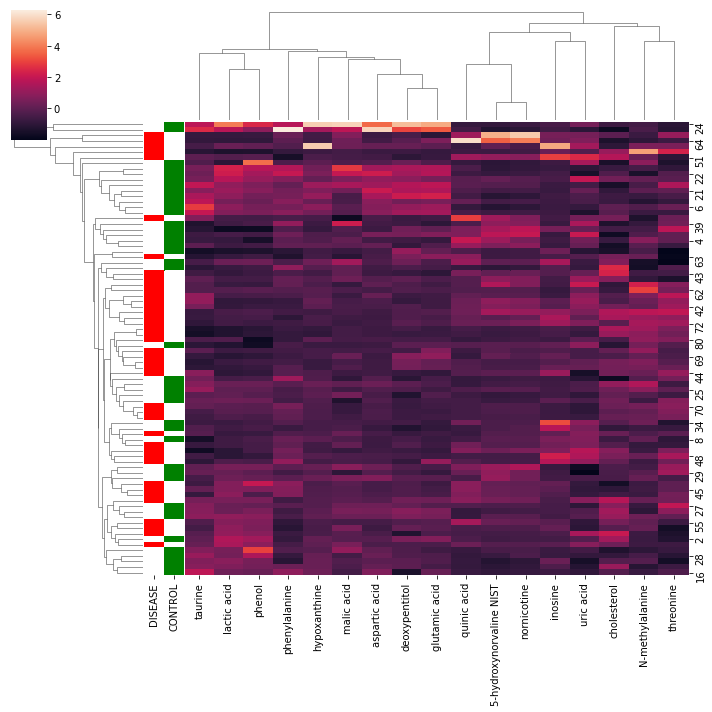

In [23]:
# Data set
import seaborn as sns
Class = final_df.pop("Class")
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
sns.clustermap(final_df, row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
# Show the graph
plt.savefig('clustermap_plasma')
plt.show()